<h1 align="center">Tutorial : multi-layer perceptron (MLP)</h1> 
<h4 align="center">Auteur : Arsène Fansi Tchango  </h4> 


In [1]:
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch.
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim

    67% |█████████████████████▊          | 383.7MB 38.8MB/s eta 0:00:05

    100% |████████████████████████████████| 566.4MB 14.3MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5ea74000 @  0x7faff242c1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 4.9MB/s 
    100% |████████████████████████████████| 2.0MB 12.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


## 1) Objective - predict the chances of survival after shipwreck


The objective is to predict if a passenger on a titanic has survived the shipwreck, only from the passenger's personal information.  

### a) Le dataset Titanic

The Titanic dataset can be downloaded following the address https://github.com/afansi/winterschool18/blob/master/titanic3.csv?raw=true.<br/>

The package [Pandas](https://pandas.pydata.org/) will allow us to upload the data automaticlaly

In [0]:
import numpy as np
import pandas as pd

In [0]:
titanic_df = pd.read_csv(
    'https://github.com/afansi/winterschool18/blob/master/titanic3.csv?raw=true', 
    sep='\t', 
    index_col=None, 
    na_values=['NA']
)

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### The dataset : 

<ol>

  <li> <b>pclass</b>: Passenger's class  (1 = first; 2 = second; 3 = third) </li>
  <li> <b>survived</b>:  0 = no; 1 = yes </li>
  <li> <b>name</b> </li>
  <li> <b>sex</b> </li>
  <li> <b>age</b></li>
  <li> <b>sibsp</b>: Number of siblings on board </li>
  <li> <b>parch</b>: Number of parents or children on board </li>
  <li> <b>ticket</b>: Ticket number </li>
  <li> <b>fare</b>: Ticket fare </li>
  <li> <b>cabin</b>: Cabine number </li>
  <li> <b>embarked</b>: Loading dock (C = Cherbourg; Q = Queenstown; S = Southampton) </li>
  <li> <b>boat</b>: Number of the rescue boat (only if the passenger has survived)</li>
  <li> <b>body</b>: Body number (if the passenger has not survived and if the body was recovered) </li>
  <li> <b>home.dest</b>: Final destination </li>
 </ol>


### b) Dataset preprocessing

Some features are not important for our objective, such as : 

<ol>
  <li> <b>name</b> </li>
  <li> <b>ticket</b>: Ticket number </li>
  <li> <b>cabin</b>: Cabine number </li>
  <li> <b>home.dest</b>: Final destination </li>
 </ol>
 
 <br/>

Other features are crucial for our objective. Included them would be cheating! : 
<ol>
  <li> <b>boat</b>: Number of the rescue boat (only if the passenger has survived) </li>
  <li> <b>body</b>: Body number (if the passenger has not survived and if the body was recovered) </li>
 </ol>
 
 <br/>
 
Some features are categorical variables which need to be changed into numerical values to be analyzed. We will use the one-hot encoding: 

 <ol>
  <li> <b>pclass</b>: Passenger's class </li>
  <li> <b>sex</b> </li>
  <li> <b>embarked</b>: Loading dock </li>
 </ol>  
 <br/>
 
The preprocessed dataset can be downloaded following this address : https://github.com/afansi/winterschool18/blob/master/titanic_prepocess.csv?raw=true.

In [0]:
titanic_preprocess_df = pd.read_csv(
    'https://github.com/afansi/winterschool18/blob/master/titanic_prepocess.csv?raw=true', 
    sep=',', 
    index_col=None
)

In [6]:
titanic_preprocess_df.head()

,survived,pclass_1,pclass_2,pclass_3,sex_female,sex_male,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,0,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,0,0,0,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,0,0,0,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,0,1,0,25.0000,1,2,151.5500,0,0,1


La signification des variables est la suivante:

<ol>
  <li> <b>survived</b>: Survie (0 = no; 1 = yes) </li>
  <li> <b>pclass_1</b>: (1 if first class; 0 if not) </li>
  <li> <b>pclass_2</b>: (1 if second class; 0 if not) </li>
  <li> <b>pclass_3</b>: (1 if third class; 0 if not) </li>
  <li> <b>sex_female</b>: (1 if the passenger is a woman; 0 if not) </li>
  <li> <b>sex_male</b>: (1 if the passenger is a man; 0 if not) </li>
  <li> <b>age</b> </li>
  <li> <b>sibsp</b>: Number of siblings on board </li>
  <li> <b>parch</b>: Number of parents or children on board </li>
  <li> <b>fare</b></li>
  <li> <b>embarked_C</b>: (1 if loading dock = Cherbourg (C); 0 if not) </li> 
  <li> <b>embarked_Q</b>: (1 if loading dock = Queenstown (Q); 0 if not) </li> 
  <li> <b>embarked_S</b>: (1 if loading dock = Southampton (S); 0 if not)</li> 
 </ol>

### c)  Train / Validation / Test datasets

It is common to divide the dataset into three parts: 

<ol>
<li> <b> Train</b> (80 % of the dataset)</li>   
<li> <b> Validation</b> (20 % of the dataset)</li>   
<li> <b> Test</b> (20 % of the dataset)</li>
</ol>

In [0]:
np.random.seed(1234)
train, validate, test = np.split(
    titanic_preprocess_df.sample(frac=1, random_state=134), 
    [int(.6*len(titanic_preprocess_df)), int(.8*len(titanic_preprocess_df))])

X_train = train.drop(['survived'], axis=1).values
y_train = train['survived'].values

X_val = validate.drop(['survived'], axis=1).values
y_val = validate['survived'].values

X_test = test.drop(['survived'], axis=1).values
y_test = test['survived'].values

## 2) Multi-Layer Perceptron (MLP)

We will use a MLP to complete this objective, using the data aove. 

List of hyperparameters: 
 <ul>
 <li> <b> 4 </b> layers (<b> 3 </b> hidden layers and <b> 1 </b> output layer </li>
 <li> input dimension (`input_size`) : <b> 12 . </b></li>
 <li> hidden layer dimensions: <b> 20, 40, 20, 2. </b> </li>
 <li> activation function:  <b> ReLU </b> (for the hidden layers)</li>
 </ul>

### a) Model architecture

<img src="https://github.com/afansi/winterschool18/blob/master/figures_tuto.pptx.png?raw=true", width=900,  height=600>

### b) Implémentation du modèle en PyTorch

#### 1 - Introductionn to Pytorch

Follow this link for a short introduction to [Pytorch](https://pytorch.org/about/)

The general documentation can be find [here](http://pytorch.org/docs/master/torch.html). 

The section on [neural networks](http://pytorch.org/docs/master/nn.html) will be very useful. 


#### 2 - Technical details

The class [torch.nn.Module](http://pytorch.org/docs/master/nn.html#module) is key to any neural networks built within Pytorch. 

It needs to have a forward function, composed of all the operations defined in the neural network, such as fully connected linear layers (see the sketch above). 

A fully connected linear layer is defined by the class [torch.nn.Linear(in_features, out_features)](http://pytorch.org/docs/master/nn.html#torch.nn.Linear). It has two inputs: 

* **in_features**: input dimensions (input_size)
* **out_features**: output dimensions 

The forward method can also include functions such as : 

* [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions): sigmoid, tanh, ReLU, etc.
* [loss functions](https://pytorch.org/docs/master/nn.html#id48): mse_loss, nll, cross_entropy, etc.
* regularisation functions: [dropout](https://pytorch.org/docs/master/nn.html#id44), etc.  


#### 3 - Example 

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1234)

In [0]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(12, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 20)
        self.fc4 = nn.Linear(20, 2)
        
    def forward(self, x):
        # see the sketch above. 
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)
    
        return out

### c) Datasets en PyTorch

Pytorch offers numerous tools for data preprocessing. See the class [Dataset(torch.utils.data.Dataset)](https://pytorch.org/docs/master/data.html#) and this [tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) for more information. 

We will be using the sub-class [TensorDataset](https://pytorch.org/docs/master/data.html?highlight=tensordataset#torch.utils.data.TensorDataset) which encapsulate the features and a target. 



In [0]:
import torch.utils.data

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())

val_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())

test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

### d) Exécution d'un réseau de neurones

In this section, we will test the model `NeuralNet()` on a subset of the data. 

Note that the predictions will be rubbish as we haven't trained the model yet. 

Note: it is important to activate the `eval()` or `train()` mode when we execute the model. 

In [0]:
import torch
from torch.autograd import Variable

In [0]:
# define the model 
neural_net = NeuralNet()

In [0]:
# set the model in .eval() mode 
neural_net = neural_net.eval()

In [0]:
# select a subset of the data 
data, target = val_dataset[0:5]

In [0]:
# # Not required in Pytorch 4
# # Encapusaulation des données dans la classe Variable
# data = Variable(data)
# target = Variable(target)

In [0]:
# Execute the model 
output = neural_net(data)   

# This is equivalent to output = neural_net.forward(data)

In [0]:
# transform the outputs in probabilities 
output_proba = F.softmax(output, dim=1)

In [18]:
print('Probabilities for each class')
print(output_proba)

Probabilities for each class
tensor([[ 0.5176,  0.4824],
        [ 0.3129,  0.6871],
        [ 0.3483,  0.6517],
        [ 0.4888,  0.5112],
        [ 0.4927,  0.5073]])


In [19]:
# The predictions are ...
probability, prediction = torch.max(output_proba, dim=1)
print(prediction)

tensor([ 0,  1,  1,  1,  1])


In [20]:
# Compare the predictions to the associated targets 
print(target)

tensor([ 0,  0,  1,  0,  1])


Again, the predictions are bad as we haven't trained the model yet.  

## 3) Loss function and optimizer 

### a) Loss function

 We will use the [cross-entropy](https://pytorch.org/docs/master/nn.html#cross-entropy) as loss function. This loss function is ideal for classification models.


In [0]:
import torch.nn.functional as F


def cost_function(prediction, target):
    loss = F.cross_entropy(prediction, target)
    return loss

### b) gradient backpropagation 

Pytorch calculates automatically the gradients of the loss function with respect to the parameters : 

loss = `cost_function(...)` <br/>
loss.`backward()`

where `cost_function` is defined above. 

### c) Optimiseur

There are numerous optimizer we can use, such as 
* SGD (stochastic gradient descent)
* ADAM (Adaptive Moment Estimation)

See this [link](https://pytorch.org/docs/master/optim.html#algorithms) for more information. 

While training, it is important to initialize the gradients with `optimizer.zero_grad()` for each minibatch. The parameters are then updated with` optimizer.step()`.  See the example below. 

In [0]:
import torch.optim as optim


# optimizer = optim.SGD(neural_net.parameters(), lr=0.001) 
optimizer = optim.Adam(neural_net.parameters(), lr=0.001) 

## 4) Training

### a) Epoch, Iteration, Mini-batch

#### Definitions: 
<ol>
<li>
<b>Epoch</b> : one pass of the full training set
</li>

<li>
<b>Itération</b> : one parameter update
</li>

<li>
<b>Mini-batch</b> : Subset of the data used to complete a parameter update. 
</li>

</ol>



#### Mini-batch: 
We will use the function<b><a href="http://pytorch.org/docs/master/data.html"> torch.utils.data.DataLoader </a></b> which divides the dataset automatically in mini-batches. 

In [0]:
train_batch_size = 32 
eval_batch_size = 32 


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

val_loader   = torch.utils.data.DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False)

test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False)

### b) Training function

We define below the training function for a given epoch. 

In [0]:
def train(epoch, model, train_loader, optimizer):
    
    # set the model in .train() mode 
    model.train()
    
    total_loss = 0
    correct = 0
    
    # iterate over all the mini-batches 
    for batch_idx, (data, target) in enumerate(train_loader):
        
#         # encapsuler les données dans la classe Variable
#         data, target = Variable(data), Variable(target)
        
        # initialize the gradients to zero 
        optimizer.zero_grad()
        
        # execute the model
        prediction = model(data)
        
        # compute the loss
        loss = cost_function(prediction, target)
        
        # compute the gradients 
        loss.backward()
        
        # update the parameters 
        optimizer.step()
        
        # accumulate the loss of each minibatch
        total_loss += loss.data[0]*len(data)
        
        # compute the accuracy per minibatch  
        pred_classes = prediction.data.max(1, keepdim=True)[1]
        correct += pred_classes.eq(target.data.view_as(pred_classes)).sum().double()
        
    # compute the mean loss for each epoch 
    mean_loss = total_loss/len(train_loader.dataset)
    
    # compute the accuracy for each epoch 
    acc = correct / len(train_loader.dataset)
        
    print('Train Epoch: {}   Avg_Loss: {:.5f}   Acc: {}/{} ({:.3f}%)'.format(
        epoch, mean_loss, correct, len(train_loader.dataset),
        100. * acc))   
    
    return mean_loss, acc

### c) Evaluation function

We define below a function which evaluates the model. 

In [0]:
def eval(model, eval_loader):
    
    # set the model in .eval() mode 
    model.eval()
    
    total_loss = 0
    correct = 0
    
    # iterate over all the mini-batches 
    for batch_idx, (data, target) in enumerate(eval_loader):
        
#         # encapsuler les données dans la classe Variable
#         data, target = Variable(data), Variable(target)
        
        # execute the model
        prediction = model(data)
        
        # compute the loss
        loss = cost_function(prediction, target) 
        
        # accumulate the loss of each minibatch
        total_loss += loss.data[0]*len(data)
        
        # compute the accuracy per minibatch  
        pred_classes = prediction.data.max(1, keepdim=True)[1]
        correct += pred_classes.eq(target.data.view_as(pred_classes)).sum().double()
    
    # compute the mean loss
    mean_loss = total_loss/len(eval_loader.dataset)
    
    # compute the accuracy 

    acc = correct / len(eval_loader.dataset)
        
    print('Eval:  Avg_Loss: {:.5f}   Acc: {}/{} ({:.3f}%)'.format(
        mean_loss, correct, len(eval_loader.dataset),
        100. * acc)) 
    
    return mean_loss, acc

### d) Checkpointing

While training, it is important to save the model parameters. We call this procedure `checkpointing`

See this [link](https://pytorch.org/docs/master/notes/serialization.html) for more information. 





In [0]:
def save_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    torch.save(model.state_dict(), filename)
    
    
    return model
    

In [0]:
def load_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    model.load_state_dict(torch.load(filename))
    
    
    return model

### e) Training

We are now ready to train the model. We will call below the functions `train()` and `eval() `defined above. 

In [28]:
# Number of epochs 
numEpochs = 300 

# checkpoint frequency 
checkpoint_freq = 10

# path to save the data 
path = './'

# empty lists 
train_losses = []
val_losses = []

train_accuracies = []
val_accuracies = []

# traininng 
for epoch in range(1, numEpochs + 1):
    
    # train() function (see above)
    train_loss, train_acc = train(epoch, neural_net, train_loader, optimizer)
    
    # eval() functionn (see above)
    val_loss, val_acc = eval(neural_net, val_loader)    
    
    # append lists for plotting and printing 
    train_losses.append(train_loss)    
    val_losses.append(val_loss)
    
    train_accuracies.append(train_acc)    
    val_accuracies.append(val_acc)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, neural_net, path)

# Last checkpoint
save_model(numEpochs, neural_net, path)
    
print("\n\n\nOptimization ended.\n")    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1   Avg_Loss: 0.68282   Acc: 388.0/625 (62.080%)
Eval:  Avg_Loss: 0.65926   Acc: 126.0/209 (60.287%)
Train Epoch: 2   Avg_Loss: 0.63238   Acc: 405.0/625 (64.800%)
Eval:  Avg_Loss: 0.62289   Acc: 135.0/209 (64.593%)
Train Epoch: 3   Avg_Loss: 0.61674   Acc: 416.0/625 (66.560%)
Eval:  Avg_Loss: 0.62996   Acc: 133.0/209 (63.636%)
Train Epoch: 4   Avg_Loss: 0.61394   Acc: 418.0/625 (66.880%)
Eval:  Avg_Loss: 0.61304   Acc: 141.0/209 (67.464%)
Train Epoch: 5   Avg_Loss: 0.60656   Acc: 425.0/625 (68.000%)
Eval:  Avg_Loss: 0.60071   Acc: 146.0/209 (69.856%)
Train Epoch: 6   Avg_Loss: 0.60540   Acc: 430.0/625 (68.800%)
Eval:  Avg_Loss: 0.62978   Acc: 124.0/209 (59.330%)
Train Epoch: 7   Avg_Loss: 0.59212   Acc: 432.0/625 (69.120%)
Eval:  Avg_Loss: 0.58410   Acc: 150.0/209 (71.770%)
Train Epoch: 8   Avg_Loss: 0.59124   Acc: 442.0/625 (70.720%)
Eval:  Avg_Loss: 0.59559   Acc: 146.0/209 (69.856%)
Train Epoch: 9   Avg_Loss: 0.56914   Acc: 445.0/625 (71.200%)
Eval:  Avg_Loss: 0.56634  

Train Epoch: 100   Avg_Loss: 0.40478   Acc: 515.0/625 (82.400%)
Eval:  Avg_Loss: 0.40830   Acc: 168.0/209 (80.383%)
Train Epoch: 101   Avg_Loss: 0.40653   Acc: 519.0/625 (83.040%)
Eval:  Avg_Loss: 0.40033   Acc: 168.0/209 (80.383%)
Train Epoch: 102   Avg_Loss: 0.40470   Acc: 514.0/625 (82.240%)
Eval:  Avg_Loss: 0.40849   Acc: 164.0/209 (78.469%)
Train Epoch: 103   Avg_Loss: 0.40538   Acc: 518.0/625 (82.880%)
Eval:  Avg_Loss: 0.40709   Acc: 166.0/209 (79.426%)
Train Epoch: 104   Avg_Loss: 0.40312   Acc: 521.0/625 (83.360%)
Eval:  Avg_Loss: 0.40808   Acc: 167.0/209 (79.904%)
Train Epoch: 105   Avg_Loss: 0.40522   Acc: 519.0/625 (83.040%)
Eval:  Avg_Loss: 0.40026   Acc: 171.0/209 (81.818%)
Train Epoch: 106   Avg_Loss: 0.41067   Acc: 519.0/625 (83.040%)
Eval:  Avg_Loss: 0.40011   Acc: 168.0/209 (80.383%)
Train Epoch: 107   Avg_Loss: 0.40309   Acc: 518.0/625 (82.880%)
Eval:  Avg_Loss: 0.40164   Acc: 168.0/209 (80.383%)
Train Epoch: 108   Avg_Loss: 0.39751   Acc: 523.0/625 (83.680%)
Eval:  A

Train Epoch: 198   Avg_Loss: 0.36959   Acc: 531.0/625 (84.960%)
Eval:  Avg_Loss: 0.45177   Acc: 166.0/209 (79.426%)
Train Epoch: 199   Avg_Loss: 0.37525   Acc: 524.0/625 (83.840%)
Eval:  Avg_Loss: 0.43555   Acc: 164.0/209 (78.469%)
Train Epoch: 200   Avg_Loss: 0.37232   Acc: 527.0/625 (84.320%)
Eval:  Avg_Loss: 0.41653   Acc: 165.0/209 (78.947%)
Train Epoch: 201   Avg_Loss: 0.38101   Acc: 521.0/625 (83.360%)
Eval:  Avg_Loss: 0.42741   Acc: 167.0/209 (79.904%)
Train Epoch: 202   Avg_Loss: 0.37665   Acc: 526.0/625 (84.160%)
Eval:  Avg_Loss: 0.41028   Acc: 165.0/209 (78.947%)
Train Epoch: 203   Avg_Loss: 0.37582   Acc: 530.0/625 (84.800%)
Eval:  Avg_Loss: 0.42154   Acc: 167.0/209 (79.904%)
Train Epoch: 204   Avg_Loss: 0.37069   Acc: 525.0/625 (84.000%)
Eval:  Avg_Loss: 0.41411   Acc: 166.0/209 (79.426%)
Train Epoch: 205   Avg_Loss: 0.36575   Acc: 527.0/625 (84.320%)
Eval:  Avg_Loss: 0.42693   Acc: 166.0/209 (79.426%)
Train Epoch: 206   Avg_Loss: 0.36790   Acc: 531.0/625 (84.960%)
Eval:  A

Train Epoch: 293   Avg_Loss: 0.34931   Acc: 532.0/625 (85.120%)
Eval:  Avg_Loss: 0.44564   Acc: 169.0/209 (80.861%)
Train Epoch: 294   Avg_Loss: 0.34232   Acc: 539.0/625 (86.240%)
Eval:  Avg_Loss: 0.45622   Acc: 166.0/209 (79.426%)
Train Epoch: 295   Avg_Loss: 0.35767   Acc: 532.0/625 (85.120%)
Eval:  Avg_Loss: 0.45176   Acc: 165.0/209 (78.947%)
Train Epoch: 296   Avg_Loss: 0.34575   Acc: 531.0/625 (84.960%)
Eval:  Avg_Loss: 0.47230   Acc: 165.0/209 (78.947%)
Train Epoch: 297   Avg_Loss: 0.34610   Acc: 537.0/625 (85.920%)
Eval:  Avg_Loss: 0.44472   Acc: 167.0/209 (79.904%)
Train Epoch: 298   Avg_Loss: 0.34362   Acc: 534.0/625 (85.440%)
Eval:  Avg_Loss: 0.44924   Acc: 168.0/209 (80.383%)
Train Epoch: 299   Avg_Loss: 0.34055   Acc: 540.0/625 (86.400%)
Eval:  Avg_Loss: 0.44653   Acc: 167.0/209 (79.904%)
Train Epoch: 300   Avg_Loss: 0.34226   Acc: 535.0/625 (85.600%)
Eval:  Avg_Loss: 0.45847   Acc: 167.0/209 (79.904%)



Optimization ended.



### f) Execution du réseau de neurones avec des données réelles

In [0]:
# activation du mode eval
neural_net = neural_net.eval()

In [0]:
# Sélection des 5 premières données du dataset de validation
data, target = val_dataset[0:5]

In [0]:
# Encapusaulation des données dans la classe Variable
data = Variable(data)

In [0]:
# Execution du réseau de neurones
output = neural_net(data)   # neural_net.forward(data)

In [0]:
# Tranformation des resultat en probabilités en utilisant la fonction SOFTMAX
output_proba = F.softmax(output, dim=1)

In [34]:
# Affichage des probabilités
print(output_proba)

tensor([[ 0.7977,  0.2023],
        [ 0.9939,  0.0061],
        [ 0.5958,  0.4042],
        [ 0.7759,  0.2241],
        [ 0.2122,  0.7878]])


In [35]:
# Affichage des prédictions (classe ayant la plus grande probabilités)
_, prediction = torch.max(output_proba, dim=1)
print(prediction)

tensor([ 0,  0,  0,  0,  1])


In [36]:
# Affichage de la vrai target
print(target)

tensor([ 0,  0,  1,  0,  1])


### Questions: 

Comment the result above 

--    

### g) Plot the learning curve 

Plotting the learning curves is important as it allows to detect overfitting. 

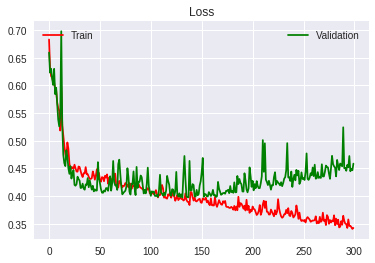

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(len(train_losses)))

ax = plt.subplot(111)
plt.plot(x, train_losses, 'r', label="Train")
plt.plot(x, val_losses, 'g', label="Validation")
plt.title('Loss')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.99)

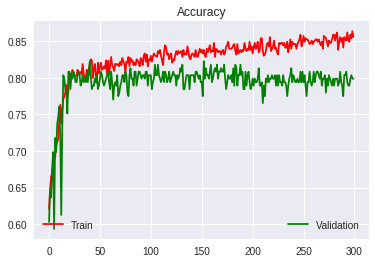

In [38]:
x = list(range(len(train_accuracies)))

ax = plt.subplot(111)
plt.plot(x, train_accuracies, 'r', label="Train")
plt.plot(x, val_accuracies, 'g', label="Validation")
plt.title('Accuracy')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.99)

### Questions: 

<b> a) Que pouvez-vous dire de ces courbes ?  <br/>
Illustrent-ils un régime de sur-apprentissage? Si non, pourquoi? Si oui, que pouvez-vous faire pour y remédier?</b> <br/>
<b> b) Que pouvez-vous faire pour améliorer la performance du réseau de neurones sur des données de validation? </b><br/>

## 5) Évaluer la performance du réseau appris sur des données de Test

Nous pouvons finalement évaluer notre modèle apppris sur notre dataset de Test.

In [39]:
test_loss, test_acc = eval(neural_net, test_loader)

Eval:  Avg_Loss: 0.51323   Acc: 167.0/209 (79.904%)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


### Questions: 

<b> a) Comparer les résultats de validation et de test ?  Le réseau appris généralise t'il aussi bien qu'espéré ? <br/>
b) Pensez-vous qu'il est possible d'utiliser un MLP pour d'autres types de données comme des image par exemple? </b> <br/>